In [1]:
from IPython.display import clear_output
import numpy as np
from time import sleep
import math
from scipy import ndimage
from scipy import misc
import random
import matplotlib.pyplot as plt

class Mapache:
    __imagen = misc.face()
    original = None
    imagen_actual = None
    piezas = None
    auxiliar = None
    error = ""

    
    def __init__(self):
        self.dimensiones = 2
        self.__imagen = misc.face()
        self.y = np.vsplit(self.__imagen, self.dimensiones)
        self.vacio = []
        self.posicion_valor=[self.dimensiones-1,self.dimensiones-1]
        for i in range(self.dimensiones):
            self.vacio.append(np.hsplit(self.y[i], self.dimensiones)) 
        self.original = np.array(self.vacio)
        self.piezas = self.original.copy()
        self.piezas[self.dimensiones-1,self.dimensiones-1,:,:,:] = np.zeros_like(self.piezas[self.dimensiones-1,self.dimensiones-1,:,:,:])
        self.original = np.copy(self.piezas)
        self.imagen_actual = np.zeros_like(self.original)
        self.desordenarImagen()
        self.armar_rompecabezas()
        self.imprimirMapache
    
    
    def desordenarImagen(self):
        numero_de_piezas = pow(self.dimensiones,2)
        posiciones_iniciales = random.sample(range(numero_de_piezas), numero_de_piezas)
        contador = 0
        for posicion in posiciones_iniciales:
            self.imagen_actual[int(contador/self.dimensiones),contador%self.dimensiones] = self.piezas[int(posicion/self.dimensiones),posicion%self.dimensiones,:,:,:]
            if(int(posicion/self.dimensiones)==self.dimensiones-1 and posicion%self.dimensiones==self.dimensiones-1):
                self.posicion_valor=[int(contador/self.dimensiones),contador%self.dimensiones]
            contador = contador + 1
    
    
    def cambiarPiezas(self, inicial, final):
        auxiliar = np.copy(self.imagen_actual[int(inicial/self.dimensiones), inicial%self.dimensiones])
        self.imagen_actual[int(inicial/self.dimensiones), inicial%self.dimensiones] = self.imagen_actual[int(final/self.dimensiones), final%self.dimensiones]                  
        self.imagen_actual[int(final/self.dimensiones), final%self.dimensiones] = np.copy(auxiliar)

    def imprimirMapache(self):
        auxiliar = []
        for i in range(self.dimensiones):
            auxiliar.append(np.hstack(self.imagen_actual[i,:,:,:,:]))
        juego = np.vstack(auxiliar)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))                 
        axes[0].imshow(juego)
        axes[1].imshow(self.__imagen)
        fig.tight_layout()
    
    
    def armar_rompecabezas(self):
        while True:
            clear_output()
            if self.error == "":
                pass
            else:
                print(self.error)
            self.error = ""
            self.imprimirMapache()
            plt.pause(1)
            
            try:
                inicial = int(input("Ingrese la posicion de la pieza de color negro: "))
                final = int(input("Ingrese la posicion a la que desea mover la pieza: "))
            except Exception:
                self.error = "El movimiento no es posibles"
                continue
            
            if inicial < 0 or inicial > 15 or final < 0 or final > 15:
                self.error = "Ingresar como posicion un numero entre 0 y 15"
            
            else:
                self.cambiarPiezas(inicial, final)
            
            if np.array_equal(self.imagen_actual, self.original):
                break
                
        clear_output()
        print("Usted a finalizado el rempecabezas")
        self.imprimirMapache()
                
        
        

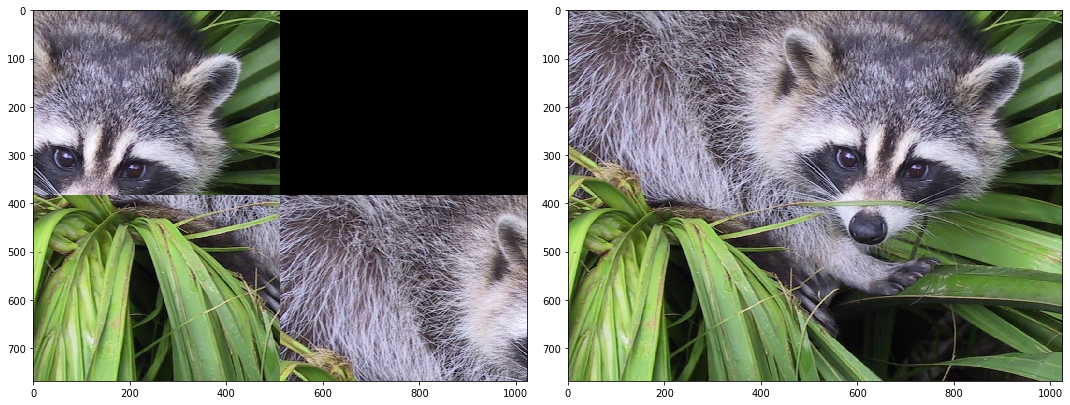

In [ ]:
mapache = Mapache()